In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #Importing the required libraries

In [2]:
df = pd.read_csv('signal-data.csv')
print(df.shape) #592 columns with only 1567 rows, extremely high dimensionality can be seen here

(1567, 592)


In [3]:
df = df.drop('Time',axis=1) #Dropping the Time column, as the timestamp is not required in training the model
df

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [4]:
print(df.dropna()) #There are NaN values in each row of the data

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 591 columns]


In [5]:
df['Pass/Fail'].value_counts() #Huge disparity between the target value counts
#This might result into training a biased model, therefore it requires specific upsampling or downsampling methods for target balancing.

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [6]:
#Since it is not viable to explore each and every variable just for the sake of the treatment of NaN values,
#let's check how many variables are not having at least 1400 not null values out of total 1567 values.
l1=[]
for i in list(df.columns):
    if len(df[df[i].notnull()]) < 1400:
        l1.append(i)

In [7]:
l1 #These columns don;t have at least 1400 non null values, therefore it's better to drop them.

['72',
 '73',
 '85',
 '109',
 '110',
 '111',
 '112',
 '157',
 '158',
 '220',
 '244',
 '245',
 '246',
 '247',
 '292',
 '293',
 '345',
 '346',
 '358',
 '382',
 '383',
 '384',
 '385',
 '492',
 '516',
 '517',
 '518',
 '519',
 '546',
 '547',
 '548',
 '549',
 '550',
 '551',
 '552',
 '553',
 '554',
 '555',
 '556',
 '557',
 '562',
 '563',
 '564',
 '565',
 '566',
 '567',
 '568',
 '569',
 '578',
 '579',
 '580',
 '581']

In [8]:
df1 = df.drop(l1,axis=1)

In [9]:
df1 #52 columns have been dropped.

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [10]:
#Let's replace the NaN value using median values.
for i in df1.columns:
    df1[i].fillna(df1[i].median(), inplace = True)

In [11]:
df1.isna().any().value_counts() #No NaN values are now presnt in the dataset.

False    539
dtype: int64

In [12]:
df1.shape #Final shape of the dataframe.

(1567, 539)

In [13]:
dupes = df1.duplicated()
sum(dupes) #0 duplicate records are present.

0

In [14]:
df1.info() #All of the variables are of numerical datatypes, therefore assuming that there are no abnormal records, otherwise the datatype would have been 'object'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 539 entries, 0 to Pass/Fail
dtypes: float64(538), int64(1)
memory usage: 6.4 MB


In [15]:
#It's very difficult to explore these many number of variables for outliers. Therefore directly replacing the outlier values using the whisker values of those variables.
from scipy.stats import zscore #Scaling the data first.
df1_scaled = df1.drop('Pass/Fail',axis=1).apply(zscore)

In [16]:
print(df1_scaled.isna().any().value_counts())
'''As there are null values after finding z-score of each variable,
it means that there are duplicated values only in those columns, therefore we need to drop those columns'''

False    422
True     116
dtype: int64


'As there are null values after finding z-score of each variable,\nit means that there are duplicated values only in those columns, therefore we need to drop those columns'

In [17]:
list_nan=[]
for i in df1_scaled.columns:
    if df1_scaled[i].isna().any():
        list_nan.append(i)

In [18]:
df2_scaled=df1_scaled.drop(list_nan,axis=1)
df2=df1.drop(list_nan,axis=1)

In [19]:
df3 = df2.drop('Pass/Fail',axis=1)

In [20]:
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1

In [21]:
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(df3 < Q1 - 1.5 * IQR)[0], np.where(df3 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df3.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(df3 > Q3 + 1.5 * IQR)[0], np.where(df3> Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df3.iloc[i,j] = whisker[j]

In [22]:
replaceStruct = {'Pass/Fail':{-1:0}}
df2=df2.replace(replaceStruct) #Replacing the -1 value from the target variable to 0.
target = df2['Pass/Fail'].copy()

In [23]:
df3['Pass/Fail'] = target 

In [24]:
df3.apply(zscore).isna().any().value_counts() #Still there are null values found, which means after transformation there are same values present in some columns

False    413
True      10
dtype: int64

In [25]:
list_nan=[]
df3_scaled=df3.drop('Pass/Fail',axis=1).apply(zscore)
for i in df3_scaled.columns:
    if df3_scaled[i].isna().any():
        list_nan.append(i)

In [26]:
df3=df3.drop(list_nan,axis=1)

In [27]:
df3.shape #Thus, this dataset will be the final dataset which can be used to train the algorithms

(1567, 413)

In [28]:
'''There are many ways, in which different types of classification algorithms can be trained on this dataset.
   First of all, we can go without target balancing or with target balancing.
   Then there are 2 ways from the point of view of feature extraction/elimination.
     1. Using the entire dataset as it is, which will take longer time to train the algorithms, but in turn might give us better accuracy
     2. Using principal component analysis (PCA) 
   Then there are 4 different ways in which cross validation can be employed here, for each of the above listed way.
     1. Without using cross validation and without any hyperparameter tuning
     2. Using k fold cross validation without any hyperparameter tuning
     3. Using leave one out cross validation (LOOCV) without any hyperparameter tuning
     3. Using grid search CV
     4. Using randomized search CV
   At last, we'll use 3 different classification algorithms in each of the above listed ways.
     1. Logistic regression
     2. SVM
     3. Random Forest'''

"There are many ways, in which different types of classification algorithms can be trained on this dataset.\n   First of all, we can go without target balancing or with target balancing.\n   Then there are 2 ways from the point of view of feature extraction/elimination.\n     1. Using the entire dataset as it is, which will take longer time to train the algorithms, but in turn might give us better accuracy\n     2. Using principal component analysis (PCA) \n   Then there are 4 different ways in which cross validation can be employed here, for each of the above listed way.\n     1. Without using cross validation and without any hyperparameter tuning\n     2. Using k fold cross validation without any hyperparameter tuning\n     3. Using leave one out cross validation (LOOCV) without any hyperparameter tuning\n     3. Using grid search CV\n     4. Using randomized search CV\n   At last, we'll use 3 different classification algorithms in each of the above listed ways.\n     1. Logistic reg

In [29]:
#Let's go with using the entire dataset first, without target balancing, without using PCA.
#Importing the classification algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
X = df3.drop('Pass/Fail',axis=1)
y = df3['Pass/Fail'] #Separating the target variable.

In [30]:
from sklearn.model_selection import train_test_split #Splitting the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [31]:
print("% of 1s in whole dataset : ",np.round(((len(df3[df3['Pass/Fail'] == 1]))/len(df3))*100,3),"%")
print("% of 0s in whole dataset : ",np.round(((len(df3[df3['Pass/Fail'] == 0]))/len(df3))*100,3),"%")
print("% of 1s in training dataset : ",np.round(((len(y_train[y_train == 1]))/len(y_train))*100,3),"%")
print("% of 0s in training dataset : ",np.round(((len(y_train[y_train == 0]))/len(y_train))*100,3),"%")
print("% of 1s in test dataset : ",np.round(((len(y_test[y_test == 1]))/len(y_test))*100,3),"%")
print("% of 0s in test dataset : ",np.round(((len(y_test[y_test == 0]))/len(y_test))*100,3),"%")
#More or less similar distribution of target variable in the entire dataset along with training and test datasets.

% of 1s in whole dataset :  6.637 %
% of 0s in whole dataset :  93.363 %
% of 1s in training dataset :  6.569 %
% of 0s in training dataset :  93.431 %
% of 1s in test dataset :  6.794 %
% of 0s in test dataset :  93.206 %


In [32]:
#Using pipeline for the following algorithms
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline_logreg = Pipeline([
    ('scaler',StandardScaler()),
    ('logreg', LogisticRegression())])
pipeline_svc = Pipeline([
    ('scaler',StandardScaler()),
    ('clf_svc', svm.SVC())])
pipeline_rf = Pipeline([
    ('scaler',StandardScaler()),
    ('clf_rf',RandomForestClassifier(n_estimators = 50, random_state=1))])
#Instantiating the algorithms at their default hyperparameter values

In [33]:
pipeline_logreg.fit(X_train,y_train)
pipeline_svc.fit(X_train,y_train)
pipeline_rf.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf_rf',
                 RandomForestClassifier(n_estimators=50, random_state=1))])

In [34]:
from sklearn.metrics import f1_score
#We'll use training and test accuracies of each model that we'll be training, along with its f1 score, in order to evaluate every model
'''We'll store following parameters in a dataframe in order to analyse the final outcomes of all of the models conveniently :-
   1. Target balancing
   2. PCA
   3. CV
   4. Algorithm
   5. Training accuracy
   6. Test Accuracy
   7. F1 score'''
df_ev = pd.DataFrame()
m=1
df_g = pd.DataFrame({m:{"Target_bal":'no',
                        "PCA":'no',
                        'CV':'no',
                        'Algorithm':'logistic',
                        "Train_acc":pipeline_logreg.score(X_train,y_train),
                        "Test_acc":pipeline_logreg.score(X_test,y_test),
                        "f1_score":f1_score(y_true=y_test,y_pred=pipeline_logreg.predict(X_test))}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1
df_g = pd.DataFrame({m:{"Target_bal":'no',
                        "PCA":'no',
                        'CV':'no',
                        'Algorithm':'svc',
                        "Train_acc":pipeline_svc.score(X_train,y_train),
                        "Test_acc":pipeline_svc.score(X_test,y_test),
                        "f1_score":f1_score(y_true=y_test,y_pred=pipeline_svc.predict(X_test))}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1
df_g = pd.DataFrame({m:{"Target_bal":'no',
                        "PCA":'no',
                        'CV':'no',
                        'Algorithm':'random_forest',
                        "Train_acc":pipeline_rf.score(X_train,y_train),
                        "Test_acc":pipeline_rf.score(X_test,y_test),
                        "f1_score":f1_score(y_true=y_test,y_pred=pipeline_rf.predict(X_test))}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1

In [35]:
df_ev

,Algorithm,CV,PCA,Target_bal,Test_acc,Train_acc,f1_score
1,logistic,no,no,no,0.908705,0.997263,0.31746
2,svc,no,no,no,0.932059,0.939781,0.0
3,random_forest,no,no,no,0.932059,0.999088,0.0


In [36]:
#Now let's go for k fold cross validation.
X1_train = X_train.copy()
y1_train = y_train.copy()
X1_test = X_test.copy()
y1_test = y_test.copy()

In [37]:
m=4
#Let's take 10 folds here.
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
l1_train_acc=[]
l1_test_acc=[]
l1_test_f1=[]
for train,val in kfold.split(X1_train): #Training the svm classifier algorithm on 10 sets of training dataset only, in order to avoid data leakage
    X11_train,X11_val = X1_train.iloc[train],X1_train.iloc[val]
    y11_train,y11_val = y1_train.iloc[train],y1_train.iloc[val]
    pipeline_svc = Pipeline([('scaler',StandardScaler()),
                             ('clf_svc', svm.SVC())])
    pipeline_svc.fit(X11_train,y11_train)
    l1_train_acc.append(pipeline_svc.score(X11_train,y11_train))
    l1_test_acc.append(pipeline_svc.score(X1_test,y1_test))
    y1_pred_test = pipeline_svc.predict(X1_test)
    l1_test_f1.append(f1_score(y_true=y1_test,y_pred=y1_pred_test))

df_g = pd.DataFrame({m:{"Target_bal":'no',
                        "PCA":'no',
                        'CV':'k-Fold',
                        'Algorithm':'svc',
                        "Train_acc":np.mean(l1_train_acc),
                        "Test_acc":np.mean(l1_test_acc),
                        "f1_score":np.mean(l1_test_f1)}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1

In [38]:
m=5
#Let's go for logistic regression classifier using k fold cross validation
l1_train_acc=[]
l1_test_acc=[]
l1_test_f1=[]
for train,val in kfold.split(X1_train):
    X11_train,X11_val = X1_train.iloc[train],X1_train.iloc[val]
    y11_train,y11_val = y1_train.iloc[train],y1_train.iloc[val]
    pipeline_logreg = Pipeline([('scaler',StandardScaler()),
                                ('logreg', LogisticRegression())])
    pipeline_logreg.fit(X11_train,y11_train)
    l1_train_acc.append(pipeline_logreg.score(X11_train,y11_train))
    l1_test_acc.append(pipeline_logreg.score(X1_test,y1_test))
    y1_pred_test = pipeline_logreg.predict(X1_test)
    l1_test_f1.append(f1_score(y_true=y1_test,y_pred=y1_pred_test))

df_g = pd.DataFrame({m:{"Target_bal":'no',
                        "PCA":'no',
                        'CV':'k-Fold',
                        'Algorithm':'logistic',
                        "Train_acc":np.mean(l1_train_acc),
                        "Test_acc":np.mean(l1_test_acc),
                        "f1_score":np.mean(l1_test_f1)}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [39]:
#Let's go for random forests classifier using k fold cross validation
l1_train_acc=[]
l1_test_acc=[]
l1_test_f1=[]
for train,val in kfold.split(X1_train):
    X11_train,X11_val = X1_train.iloc[train],X1_train.iloc[val]
    y11_train,y11_val = y1_train.iloc[train],y1_train.iloc[val]
    pipeline_rf = Pipeline([('scaler',StandardScaler()),
                            ('clf_rf', RandomForestClassifier(n_estimators = 50, random_state=1))])
    pipeline_rf.fit(X11_train,y11_train)
    l1_train_acc.append(pipeline_rf.score(X11_train,y11_train))
    l1_test_acc.append(pipeline_rf.score(X1_test,y1_test))
    y1_pred_test = pipeline_rf.predict(X1_test)
    l1_test_f1.append(f1_score(y_true=y1_test,y_pred=y1_pred_test))

df_g = pd.DataFrame({m:{"Target_bal":'no',
                        "PCA":'no',
                        'CV':'k-Fold',
                        'Algorithm':'random_forest',
                        "Train_acc":np.mean(l1_train_acc),
                        "Test_acc":np.mean(l1_test_acc),
                        "f1_score":np.mean(l1_test_f1)}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1

In [40]:
print(df_ev) 
'''We can see that only cross validation without hyperparameter tuning leads to poorer results than the previous models
and a higher degree of overfitting can be seen here'''

       Algorithm      CV PCA Target_bal  Test_acc Train_acc  f1_score
1       logistic      no  no         no  0.908705  0.997263   0.31746
2            svc      no  no         no  0.932059  0.939781       0.0
3  random_forest      no  no         no  0.932059  0.999088       0.0
4            svc  k-Fold  no         no  0.932059   0.93897       0.0
5       logistic  k-Fold  no         no  0.901486  0.999595  0.266502
6  random_forest  k-Fold  no         no  0.932059  0.998986       0.0


'We can see that only cross validation without hyperparameter tuning leads to poorer results than the previous models\nand a higher degree of overfitting can be seen here'

In [41]:
'''We can also try leave one out cross validation without hyperparameter tuning here, but as it'll take very long time to execute
   and the results will be approximately equal to the previous models without cv. Therefore we'll not go for LOOCV models here.'''

"We can also try leave one out cross validation without hyperparameter tuning here, but as it'll take very long time to execute\n   and the results will be approximately equal to the previous models without cv. Therefore we'll not go for LOOCV models here."

In [42]:
#Let's go for randomized search CV first, in order to find the approximate range of the hyperparameters that give us best fit model.
#then we can use grid search CV to find out the exact set of hyperparameters according to the range found out by using the previous CV.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
pipeline_logreg = Pipeline([
    ('scaler',StandardScaler()),
    ('logreg', LogisticRegression())])
pipeline_svc = Pipeline([
    ('scaler',StandardScaler()),
    ('clf_svc', svm.SVC())])
pipeline_rf = Pipeline([
    ('scaler',StandardScaler()),
    ('clf_rf',RandomForestClassifier(n_estimators = 50, random_state=1))])
param_grid_svc = {'clf_svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'clf_svc__gamma': [0.001, 0.01, 0.1, 1, 10], 
                  'clf_svc__kernel':['rbf','poly']}
param_grid_logreg = {'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear'],
                     'logreg__penalty': ['none', 'l1', 'l2', 'elasticnet'],
                     'logreg__C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100]}
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
param_grid_rf={'clf_rf__max_features': max_features,
               'clf_rf__max_depth': max_depth,
               'clf_rf__min_samples_split': min_samples_split,
               'clf_rf__min_samples_leaf': min_samples_leaf,
               'clf_rf__bootstrap': bootstrap,
               "clf_rf__criterion": ["gini", "entropy"]}

In [45]:
randomCV_logreg = RandomizedSearchCV(pipeline_logreg, param_distributions=param_grid_logreg, n_iter=50)
randomCV_svc = RandomizedSearchCV(pipeline_svc, param_distributions=param_grid_svc, n_iter=50)
randomCV_rf = RandomizedSearchCV(pipeline_rf, param_distributions=param_grid_rf, n_iter=50)

In [46]:
randomCV_logreg.fit(X1_train,y1_train)
randomCV_svc.fit(X1_train,y1_train)
randomCV_rf.fit(X1_train,y1_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting 

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('clf_rf',
                                              RandomForestClassifier(n_estimators=50,
                                                                     random_state=1))]),
                   n_iter=50,
                   param_distributions={'clf_rf__bootstrap': [True, False],
                                        'clf_rf__criterion': ['gini',
                                                              'entropy'],
                                        'clf_rf__max_depth': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100, 110,
                                                              None],
                                        'clf_rf__max_features': ['auto',
                                                                 'sqrt

In [47]:
randomCV_rf.best_params_ #Listing out the general approximation of best possible hyperparameters for all 3 models

{'clf_rf__min_samples_split': 10,
 'clf_rf__min_samples_leaf': 4,
 'clf_rf__max_features': 'auto',
 'clf_rf__max_depth': 90,
 'clf_rf__criterion': 'gini',
 'clf_rf__bootstrap': False}

In [48]:
randomCV_svc.best_params_

{'clf_svc__kernel': 'rbf', 'clf_svc__gamma': 1, 'clf_svc__C': 0.001}

In [49]:
randomCV_logreg.best_params_

{'logreg__solver': 'lbfgs', 'logreg__penalty': 'l2', 'logreg__C': 0.0001}

In [50]:
print('Best training accuracy of logistic regression model after randomized CV: ', randomCV_logreg.best_score_)
print('Best training accuracy of svc model after randomized CV: ', randomCV_svc.best_score_)
print('Best training accuracy of random forest model after randomized CV: ', randomCV_rf.best_score_)

Best training accuracy of logistic regression model after randomized CV:  0.9343088418430885
Best training accuracy of svc model after randomized CV:  0.9343088418430885
Best training accuracy of random forest model after randomized CV:  0.9343088418430885


In [51]:
#Let's use the full grid search over the range near the above listed hyperparameters.
param_grid_svc1 = {'clf_svc__C': [i for i in np.arange(0.0005,0.0035,0.0005)],
                  'clf_svc__gamma': [i for i in np.arange(0.0005,0.0035,0.0005)], 
                  'clf_svc__kernel':['rbf','poly']}
param_grid_logreg1 = {'logreg__solver': ['lbfgs', 'liblinear'],
                     'logreg__penalty': ['l1', 'l2'],
                     'logreg__C':[i for i in np.arange(0.000005,0.000035,0.000005)]}
param_grid_rf1={'clf_rf__max_features':  ['auto', 'sqrt'],
               'clf_rf__max_depth': max_depth,
               'clf_rf__min_samples_split': min_samples_split,
               'clf_rf__min_samples_leaf': min_samples_leaf,
               'clf_rf__bootstrap': bootstrap,
               "clf_rf__criterion": ["gini", "entropy"]}

In [52]:
grid_logreg = GridSearchCV( pipeline_logreg , param_grid = param_grid_logreg1, cv = 10)
grid_svc = GridSearchCV( pipeline_svc , param_grid = param_grid_svc1, cv = 10)
grid_rf = GridSearchCV( pipeline_rf , param_grid = param_grid_rf1, cv = 10)

In [53]:
'''grid_logreg.fit(X_train,y_train)
grid_svc.fit(X_train,y_train)
grid_rf.fit(X_train,y_train)'''
#Extremely time consuming complex algorithms, therefore it is impossible to run these models on the entire dataset.
#Going for feature elimination using PCA now.

'grid_logreg.fit(X_train,y_train)\ngrid_svc.fit(X_train,y_train)\ngrid_rf.fit(X_train,y_train)'

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
pca.fit(X.apply(zscore))

PCA(n_components=300)

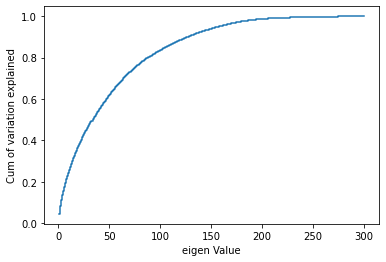

In [55]:
plt.step(list(range(1,301)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')

plt.show() #As we can see in the plot that out of total 413 variables, their combination resulting into only 150 components can give us more than 90% explained variance of the data

In [56]:
pipeline_logreg_p = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=150)),
    ('logreg', LogisticRegression())])
pipeline_svc_p = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=150)),
    ('clf_svc', svm.SVC())])
pipeline_rf_p = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=150)),
    ('clf_rf',RandomForestClassifier(n_estimators = 50, random_state=1))])

In [57]:
pipeline_logreg_p.fit(X_train,y_train)
pipeline_svc_p.fit(X_train,y_train)
pipeline_rf_p.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=150)),
                ('clf_rf',
                 RandomForestClassifier(n_estimators=50, random_state=1))])

In [58]:
df_g = pd.DataFrame({m:{"Target_bal":'no',
                        "PCA":'yes',
                        'CV':'no',
                        'Algorithm':'logistic',
                        "Train_acc":pipeline_logreg_p.score(X_train,y_train),
                        "Test_acc":pipeline_logreg_p.score(X_test,y_test),
                        "f1_score":f1_score(y_true=y_test,y_pred=pipeline_logreg_p.predict(X_test))}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1
df_g = pd.DataFrame({m:{"Target_bal":'no',
                        "PCA":'yes',
                        'CV':'no',
                        'Algorithm':'svc',
                        "Train_acc":pipeline_svc_p.score(X_train,y_train),
                        "Test_acc":pipeline_svc_p.score(X_test,y_test),
                        "f1_score":f1_score(y_true=y_test,y_pred=pipeline_svc_p.predict(X_test))}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1
df_g = pd.DataFrame({m:{"Target_bal":'no',
                        "PCA":'yes',
                        'CV':'no',
                        'Algorithm':'random_forest',
                        "Train_acc":pipeline_rf_p.score(X_train,y_train),
                        "Test_acc":pipeline_rf_p.score(X_test,y_test),
                        "f1_score":f1_score(y_true=y_test,y_pred=pipeline_rf_p.predict(X_test))}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1

In [59]:
kfold = KFold(n_splits=10)
l1_train_acc=[]
l1_test_acc=[]
l1_test_f1=[]
for train,val in kfold.split(X1_train): #Training the svm classifier algorithm on 10 sets of training dataset only, in order to avoid data leakage
    X11_train,X11_val = X1_train.iloc[train],X1_train.iloc[val]
    y11_train,y11_val = y1_train.iloc[train],y1_train.iloc[val]
    pipeline_svc = Pipeline([('scaler',StandardScaler()),
                             ('pca',PCA(n_components=150)),
                             ('clf_svc', svm.SVC())])
    pipeline_svc.fit(X11_train,y11_train)
    l1_train_acc.append(pipeline_svc.score(X11_train,y11_train))
    l1_test_acc.append(pipeline_svc.score(X1_test,y1_test))
    y1_pred_test = pipeline_svc.predict(X1_test)
    l1_test_f1.append(f1_score(y_true=y1_test,y_pred=y1_pred_test))

df_g = pd.DataFrame({m:{"Target_bal":'no',
                        "PCA":'yes',
                        'CV':'k-Fold',
                        'Algorithm':'svc',
                        "Train_acc":np.mean(l1_train_acc),
                        "Test_acc":np.mean(l1_test_acc),
                        "f1_score":np.mean(l1_test_f1)}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1

In [60]:
l1_train_acc=[]
l1_test_acc=[]
l1_test_f1=[]
for train,val in kfold.split(X1_train):
    X11_train,X11_val = X1_train.iloc[train],X1_train.iloc[val]
    y11_train,y11_val = y1_train.iloc[train],y1_train.iloc[val]
    pipeline_logreg = Pipeline([('scaler',StandardScaler()),
                                ('pca',PCA(n_components=150)),
                                ('logreg', LogisticRegression())])
    pipeline_logreg.fit(X11_train,y11_train)
    l1_train_acc.append(pipeline_logreg.score(X11_train,y11_train))
    l1_test_acc.append(pipeline_logreg.score(X1_test,y1_test))
    y1_pred_test = pipeline_logreg.predict(X1_test)
    l1_test_f1.append(f1_score(y_true=y1_test,y_pred=y1_pred_test))

df_g = pd.DataFrame({m:{"Target_bal":'no',
                        "PCA":'yes',
                        'CV':'k-Fold',
                        'Algorithm':'logistic',
                        "Train_acc":np.mean(l1_train_acc),
                        "Test_acc":np.mean(l1_test_acc),
                        "f1_score":np.mean(l1_test_f1)}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1

In [61]:
l1_train_acc=[]
l1_test_acc=[]
l1_test_f1=[]
for train,val in kfold.split(X1_train):
    X11_train,X11_val = X1_train.iloc[train],X1_train.iloc[val]
    y11_train,y11_val = y1_train.iloc[train],y1_train.iloc[val]
    pipeline_rf = Pipeline([('scaler',StandardScaler()),
                            ('pca',PCA(n_components=150)),
                            ('clf_rf', RandomForestClassifier(n_estimators = 50, random_state=1))])
    pipeline_rf.fit(X11_train,y11_train)
    l1_train_acc.append(pipeline_rf.score(X11_train,y11_train))
    l1_test_acc.append(pipeline_rf.score(X1_test,y1_test))
    y1_pred_test = pipeline_rf.predict(X1_test)
    l1_test_f1.append(f1_score(y_true=y1_test,y_pred=y1_pred_test))

df_g = pd.DataFrame({m:{"Target_bal":'no',
                        "PCA":'yes',
                        'CV':'k-Fold',
                        'Algorithm':'random_forest',
                        "Train_acc":np.mean(l1_train_acc),
                        "Test_acc":np.mean(l1_test_acc),
                        "f1_score":np.mean(l1_test_f1)}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1

In [62]:
#Let's go for randomized search CV on the PCA generated data
randomCV_logreg_p = RandomizedSearchCV(pipeline_logreg_p, param_distributions=param_grid_logreg, n_iter=50)
randomCV_svc_p = RandomizedSearchCV(pipeline_svc_p, param_distributions=param_grid_svc, n_iter=50)
randomCV_rf_p = RandomizedSearchCV(pipeline_rf_p, param_distributions=param_grid_rf, n_iter=50)

In [63]:
randomCV_logreg_p.fit(X1_train,y1_train)
randomCV_svc_p.fit(X1_train,y1_train)
randomCV_rf_p.fit(X1_train,y1_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will igno

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA(n_components=150)),
                                             ('clf_rf',
                                              RandomForestClassifier(n_estimators=50,
                                                                     random_state=1))]),
                   n_iter=50,
                   param_distributions={'clf_rf__bootstrap': [True, False],
                                        'clf_rf__criterion': ['gini',
                                                              'entropy'],
                                        'clf_rf__max_depth': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100, 110,
                                                              None],
                                        'clf_rf__max_features': ['

In [64]:
randomCV_logreg_p.best_params_

{'logreg__solver': 'liblinear', 'logreg__penalty': 'l1', 'logreg__C': 0.0001}

In [65]:
randomCV_svc_p.best_params_

{'clf_svc__kernel': 'rbf', 'clf_svc__gamma': 0.001, 'clf_svc__C': 0.001}

In [66]:
randomCV_rf_p.best_params_ #Difference can be seen between the best parameters obtained by randomized search before and after PCA

{'clf_rf__min_samples_split': 2,
 'clf_rf__min_samples_leaf': 4,
 'clf_rf__max_features': 'sqrt',
 'clf_rf__max_depth': 20,
 'clf_rf__criterion': 'gini',
 'clf_rf__bootstrap': True}

In [67]:
print('Best training accuracy of logistic regression model after randomized CV: ', randomCV_logreg_p.best_score_)
print('Best training accuracy of svc model after randomized CV: ', randomCV_svc_p.best_score_)
print('Best training accuracy of random forest model after randomized CV: ', randomCV_rf_p.best_score_)

Best training accuracy of logistic regression model after randomized CV:  0.9343088418430885
Best training accuracy of svc model after randomized CV:  0.9343088418430885
Best training accuracy of random forest model after randomized CV:  0.9343088418430885


In [68]:
#Let's use the full grid search over the range near the above listed hyperparameters.
param_grid_svc_p = {'clf_svc__C': [i for i in np.arange(0.0005,0.0025,0.0005)],
                  'clf_svc__gamma': [i for i in np.arange(0.005,0.025,0.005)], 
                  'clf_svc__kernel':['poly']}
param_grid_logreg_p = {'logreg__solver': ['newton-cg'],
                     'logreg__penalty': ['l2'],
                     'logreg__C':[i for i in np.arange(0.000005,0.000025,0.000005)]}
param_grid_rf_p = {'clf_rf__max_features':  ['sqrt'],
               'clf_rf__max_depth': [60,65,70,75,80],
               'clf_rf__min_samples_split': [4,5,6],
               'clf_rf__min_samples_leaf': [1],
               'clf_rf__bootstrap': [True],
               "clf_rf__criterion": ["gini"]}

In [69]:
grid_logreg_p = GridSearchCV( pipeline_logreg_p , param_grid = param_grid_logreg_p, cv = 5)
grid_svc_p = GridSearchCV( pipeline_svc_p , param_grid = param_grid_svc_p, cv = 5)
grid_rf_p = GridSearchCV( pipeline_rf_p , param_grid = param_grid_rf_p, cv = 5)

In [70]:
grid_logreg_p.fit(X_train,y_train)
grid_svc_p.fit(X_train,y_train)
grid_rf_p.fit(X_train,y_train) #Fast execution due to feature elimination

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=150)),
                                       ('clf_rf',
                                        RandomForestClassifier(n_estimators=50,
                                                               random_state=1))]),
             param_grid={'clf_rf__bootstrap': [True],
                         'clf_rf__criterion': ['gini'],
                         'clf_rf__max_depth': [60, 65, 70, 75, 80],
                         'clf_rf__max_features': ['sqrt'],
                         'clf_rf__min_samples_leaf': [1],
                         'clf_rf__min_samples_split': [4, 5, 6]})

In [71]:
df_g = pd.DataFrame({m:{"Target_bal":'no',
                        "PCA":'yes',
                        'CV':'GridSearch',
                        'Algorithm':'random_forest',
                        "Train_acc":grid_rf_p.score(X_train,y_train),
                        "Test_acc":grid_rf_p.score(X_test,y_test),
                        "f1_score":f1_score(y_true=y_test,y_pred=grid_rf_p.predict(X_test))}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1
df_g = pd.DataFrame({m:{"Target_bal":'no',
                        "PCA":'yes',
                        'CV':'GridSearch',
                        'Algorithm':'svc',
                        "Train_acc":grid_svc_p.score(X_train,y_train),
                        "Test_acc":grid_svc_p.score(X_test,y_test),
                        "f1_score":f1_score(y_true=y_test,y_pred=grid_svc_p.predict(X_test))}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1
df_g = pd.DataFrame({m:{"Target_bal":'no',
                        "PCA":'yes',
                        'CV':'GridSearch',
                        'Algorithm':'logreg',
                        "Train_acc":grid_logreg_p.score(X_train,y_train),
                        "Test_acc":grid_logreg_p.score(X_test,y_test),
                        "f1_score":f1_score(y_true=y_test,y_pred=grid_logreg_p.predict(X_test))}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1

In [72]:
df_ev #We can see that the f1 metric is zero in many cases, which means that the resultant models are highly biased towards predicting the target variable as zeroes.
#Let's try target balancing in this case, by using imblearn library

,Algorithm,CV,PCA,Target_bal,Test_acc,Train_acc,f1_score
1,logistic,no,no,no,0.908705,0.997263,0.31746
2,svc,no,no,no,0.932059,0.939781,0.0
3,random_forest,no,no,no,0.932059,0.999088,0.0
4,svc,k-Fold,no,no,0.932059,0.93897,0.0
5,logistic,k-Fold,no,no,0.901486,0.999595,0.266502
6,random_forest,k-Fold,no,no,0.932059,0.998986,0.0
7,logistic,no,yes,no,0.908705,0.961679,0.271186
8,svc,no,yes,no,0.932059,0.938869,0.0
9,random_forest,no,yes,no,0.932059,0.998175,0.0
10,svc,k-Fold,yes,no,0.932059,0.938463,0.0


In [73]:
from imblearn.over_sampling import SMOTE #Let's try upsampling in this case.

In [74]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [75]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))
#Only 72 1s.
print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))

Before UpSampling, counts of label '1': 72
Before UpSampling, counts of label '0': 1024 

After UpSampling, counts of label '1': 1024
After UpSampling, counts of label '0': 1024 



In [76]:
#Directly going for PCA version of the data to train the upsampled data, in order to reduce the computation time
pipeline_logreg_p.fit(X_train_res,y_train_res)
pipeline_svc_p.fit(X_train_res,y_train_res)
pipeline_rf_p.fit(X_train_res,y_train_res)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=150)),
                ('clf_rf',
                 RandomForestClassifier(n_estimators=50, random_state=1))])

In [77]:
df_g = pd.DataFrame({m:{"Target_bal":'yes',
                        "PCA":'yes',
                        'CV':'no',
                        'Algorithm':'logistic',
                        "Train_acc":pipeline_logreg_p.score(X_train_res,y_train_res),
                        "Test_acc":pipeline_logreg_p.score(X_test,y_test),
                        "f1_score":f1_score(y_true=y_test,y_pred=pipeline_logreg_p.predict(X_test))}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1
df_g = pd.DataFrame({m:{"Target_bal":'yes',
                        "PCA":'yes',
                        'CV':'no',
                        'Algorithm':'svc',
                        "Train_acc":pipeline_svc_p.score(X_train_res,y_train_res),
                        "Test_acc":pipeline_svc_p.score(X_test,y_test),
                        "f1_score":f1_score(y_true=y_test,y_pred=pipeline_svc_p.predict(X_test))}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1
df_g = pd.DataFrame({m:{"Target_bal":'yes',
                        "PCA":'yes',
                        'CV':'no',
                        'Algorithm':'random_forest',
                        "Train_acc":pipeline_rf_p.score(X_train_res,y_train_res),
                        "Test_acc":pipeline_rf_p.score(X_test,y_test),
                        "f1_score":f1_score(y_true=y_test,y_pred=pipeline_rf_p.predict(X_test))}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1

In [78]:
pd.Series(y_train_res)

0       0
1       0
2       0
3       0
4       0
       ..
2043    1
2044    1
2045    1
2046    1
2047    1
Length: 2048, dtype: int64

In [79]:
l1_train_acc=[]
l1_test_acc=[]
l1_test_f1=[]
for train,val in kfold.split(X_train_res): #Training the svm classifier algorithm on 10 sets of training dataset only, in order to avoid data leakage
    X11_train,X11_val = X_train_res.iloc[train],X_train_res.iloc[val]
    y11_train,y11_val = pd.Series(y_train_res).iloc[train],pd.Series(y_train_res).iloc[val]
    pipeline_svc = Pipeline([('scaler',StandardScaler()),
                             ('pca',PCA(n_components=150)),
                             ('clf_svc', svm.SVC())])
    pipeline_svc.fit(X11_train,y11_train)
    l1_train_acc.append(pipeline_svc.score(X_train_res,y_train_res))
    l1_test_acc.append(pipeline_svc.score(X1_test,y1_test))
    y1_pred_test = pipeline_svc.predict(X1_test)
    l1_test_f1.append(f1_score(y_true=y1_test,y_pred=y1_pred_test))

df_g = pd.DataFrame({m:{"Target_bal":'yes',
                        "PCA":'yes',
                        'CV':'k-Fold',
                        'Algorithm':'svc',
                        "Train_acc":np.mean(l1_train_acc),
                        "Test_acc":np.mean(l1_test_acc),
                        "f1_score":np.mean(l1_test_f1)}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1

In [80]:
l1_train_acc=[]
l1_test_acc=[]
l1_test_f1=[]
for train,val in kfold.split(X_train_res): 
    X11_train,X11_val = X_train_res.iloc[train],X_train_res.iloc[val]
    y11_train,y11_val = pd.Series(y_train_res).iloc[train],pd.Series(y_train_res).iloc[val]
    pipeline_logreg = Pipeline([('scaler',StandardScaler()),
                                ('pca',PCA(n_components=150)),
                                ('logreg', LogisticRegression())])
    pipeline_logreg.fit(X11_train,y11_train)
    l1_train_acc.append(pipeline_logreg.score(X_train_res,y_train_res))
    l1_test_acc.append(pipeline_logreg.score(X1_test,y1_test))
    y1_pred_test = pipeline_logreg.predict(X1_test)
    l1_test_f1.append(f1_score(y_true=y1_test,y_pred=y1_pred_test))

df_g = pd.DataFrame({m:{"Target_bal":'yes',
                        "PCA":'yes',
                        'CV':'k-Fold',
                        'Algorithm':'logistic',
                        "Train_acc":np.mean(l1_train_acc),
                        "Test_acc":np.mean(l1_test_acc),
                        "f1_score":np.mean(l1_test_f1)}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
l1_train_acc=[]
l1_test_acc=[]
l1_test_f1=[]
for train,val in kfold.split(X_train_res): 
    X11_train,X11_val = X_train_res.iloc[train],X_train_res.iloc[val]
    y11_train,y11_val = pd.Series(y_train_res).iloc[train],pd.Series(y_train_res).iloc[val]
    pipeline_rf = Pipeline([('scaler',StandardScaler()),
                            ('pca',PCA(n_components=150)),
                            ('clf_rf', RandomForestClassifier(n_estimators = 50, random_state=1))])
    pipeline_rf.fit(X11_train,y11_train)
    l1_train_acc.append(pipeline_rf.score(X_train_res,y_train_res))
    l1_test_acc.append(pipeline_rf.score(X1_test,y1_test))
    y1_pred_test = pipeline_rf.predict(X1_test)
    l1_test_f1.append(f1_score(y_true=y1_test,y_pred=y1_pred_test))

df_g = pd.DataFrame({m:{"Target_bal":'yes',
                        "PCA":'yes',
                        'CV':'k-Fold',
                        'Algorithm':'random_forest',
                        "Train_acc":np.mean(l1_train_acc),
                        "Test_acc":np.mean(l1_test_acc),
                        "f1_score":np.mean(l1_test_f1)}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1

In [82]:
#Let's go for randomized search CV on the PCA generated data
randomCV_logreg_p = RandomizedSearchCV(pipeline_logreg_p, param_distributions=param_grid_logreg, n_iter=50)
randomCV_svc_p = RandomizedSearchCV(pipeline_svc_p, param_distributions=param_grid_svc, n_iter=50)
randomCV_rf_p = RandomizedSearchCV(pipeline_rf_p, param_distributions=param_grid_rf, n_iter=50)

In [83]:
randomCV_logreg_p.fit(X_train_res,y_train_res)
randomCV_svc_p.fit(X_train_res,y_train_res)
randomCV_rf_p.fit(X_train_res,y_train_res)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ig

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA(n_components=150)),
                                             ('clf_rf',
                                              RandomForestClassifier(n_estimators=50,
                                                                     random_state=1))]),
                   n_iter=50,
                   param_distributions={'clf_rf__bootstrap': [True, False],
                                        'clf_rf__criterion': ['gini',
                                                              'entropy'],
                                        'clf_rf__max_depth': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100, 110,
                                                              None],
                                        'clf_rf__max_features': ['

In [84]:
randomCV_logreg_p.best_params_

{'logreg__solver': 'lbfgs', 'logreg__penalty': 'none', 'logreg__C': 1e-05}

In [85]:
randomCV_svc_p.best_params_

{'clf_svc__kernel': 'rbf', 'clf_svc__gamma': 0.01, 'clf_svc__C': 1}

In [86]:
randomCV_rf_p.best_params_ #Again, different optimum hyperparameters are found out.

{'clf_rf__min_samples_split': 2,
 'clf_rf__min_samples_leaf': 1,
 'clf_rf__max_features': 'auto',
 'clf_rf__max_depth': 70,
 'clf_rf__criterion': 'gini',
 'clf_rf__bootstrap': True}

In [87]:
print('Best training accuracy of logistic regression model after randomized CV: ', randomCV_logreg_p.best_score_)
print('Best training accuracy of svc model after randomized CV: ', randomCV_svc_p.best_score_)
print('Best training accuracy of random forest model after randomized CV: ', randomCV_rf_p.best_score_)

Best training accuracy of logistic regression model after randomized CV:  0.9340783588764984
Best training accuracy of svc model after randomized CV:  1.0
Best training accuracy of random forest model after randomized CV:  0.9995121951219513


In [88]:
#Let's use the full grid search over the range near the above listed hyperparameters.
param_grid_svc_p = {'clf_svc__C': [i for i in np.arange(0.5,2.5,0.5)],
                  'clf_svc__gamma': [i for i in np.arange(0.005,0.025,0.005)], 
                  'clf_svc__kernel':['rbf']}
param_grid_logreg_p = {'logreg__solver': ['liblinear'],
                     'logreg__penalty': ['l2'],
                     'logreg__C':[i for i in np.arange(50,250,50)]}
param_grid_rf_p = {'clf_rf__max_features':  ['auto'],
               'clf_rf__max_depth': [80,90,100],
               'clf_rf__min_samples_split': [4,5,6],
               'clf_rf__min_samples_leaf': [2,3,4],
               'clf_rf__bootstrap': [False],
               "clf_rf__criterion": ["gini"]}

In [89]:
grid_logreg_p = GridSearchCV( pipeline_logreg_p , param_grid = param_grid_logreg_p, cv = 5)
grid_svc_p = GridSearchCV( pipeline_svc_p , param_grid = param_grid_svc_p, cv = 5)
grid_rf_p = GridSearchCV( pipeline_rf_p , param_grid = param_grid_rf_p, cv = 5)

In [90]:
grid_logreg_p.fit(X_train_res,y_train_res)
grid_svc_p.fit(X_train_res,y_train_res)
grid_rf_p.fit(X_train_res,y_train_res) #Fast execution due to feature elimination

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=150)),
                                       ('clf_rf',
                                        RandomForestClassifier(n_estimators=50,
                                                               random_state=1))]),
             param_grid={'clf_rf__bootstrap': [False],
                         'clf_rf__criterion': ['gini'],
                         'clf_rf__max_depth': [80, 90, 100],
                         'clf_rf__max_features': ['auto'],
                         'clf_rf__min_samples_leaf': [2, 3, 4],
                         'clf_rf__min_samples_split': [4, 5, 6]})

In [91]:
df_g = pd.DataFrame({m:{"Target_bal":'yes',
                        "PCA":'yes',
                        'CV':'GridSearch',
                        'Algorithm':'random_forest',
                        "Train_acc":grid_rf_p.score(X_train_res,y_train_res),
                        "Test_acc":grid_rf_p.score(X_test,y_test),
                        "f1_score":f1_score(y_true=y_test,y_pred=grid_rf_p.predict(X_test))}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1
df_g = pd.DataFrame({m:{"Target_bal":'yes',
                        "PCA":'yes',
                        'CV':'GridSearch',
                        'Algorithm':'svc',
                        "Train_acc":grid_svc_p.score(X_train_res,y_train_res),
                        "Test_acc":grid_svc_p.score(X_test,y_test),
                        "f1_score":f1_score(y_true=y_test,y_pred=grid_svc_p.predict(X_test))}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1
df_g = pd.DataFrame({m:{"Target_bal":'yes',
                        "PCA":'yes',
                        'CV':'GridSearch',
                        'Algorithm':'logreg',
                        "Train_acc":grid_logreg_p.score(X_train_res,y_train_res),
                        "Test_acc":grid_logreg_p.score(X_test,y_test),
                        "f1_score":f1_score(y_true=y_test,y_pred=grid_logreg_p.predict(X_test))}}).transpose()
df_ev = pd.concat([df_ev,df_g])
m+=1

In [92]:
#Neglecting the higher execution timing and higher dimensionality, the first and foremost logistic regression model without target balancing, without PCA and without CV gives us best f1 score.


In [93]:
pipeline_logreg = Pipeline([
    ('scaler',StandardScaler()),
    ('logreg', LogisticRegression())])
pipeline_logreg.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [94]:
pipeline_logreg.score(X_test,y_test)

0.9087048832271762

Confusion Matrix for testing data of the decision tree with Gini impurity as solving method.


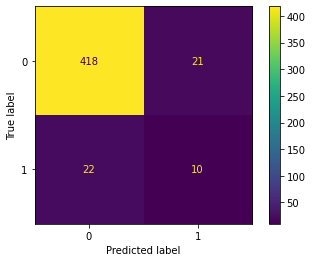

In [95]:
from sklearn import metrics

print("Confusion Matrix for testing data of the decision tree with Gini impurity as solving method.")
pred_test = pipeline_logreg.predict(X_test)
cm=metrics.confusion_matrix(y_test, pred_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

In [96]:
#Importing the future file.
df_f = pd.read_excel('Future_predictions.xlsx')

In [97]:
df_f = df_f.drop('Time',axis=1)

In [98]:
df_f = df_f[[int(i) for i in X.columns]]

In [99]:
df_f=df_f.dropna()

In [100]:
y_pred_fut = pipeline_logreg.predict(df_f)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [101]:
y_pred_fut

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [ ]:
'''Conclusion:-
   while it is advisable to test various data simplification techniques such as feature elimination, target balancing, etc. along
   with different cross validation techniques, it is observed in this case that such methods have only lowered the accuracy of the models
   compared with that of the ones performed on the data after such techniques.
   Even after target balancing, the f1 scores of svc and random forests models remained zero, which means that the models were still heavily biased toward
   prediciting zeroes only.
   Sometimes, as in this case, it is better to stick with the simpler models, without any cross valiation and other data simplication techniques.'''